In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.linalg
import scipy

print(np.__version__)
print(matplotlib.__version__)
print(scipy.__version__)

1.26.0
3.8.0
1.11.2


# Non-linear differential equation

$ y'' = px \times cos(y), ~p = 1$

$ y'(0) = 0, ~y(1) = 0 $

#### To system:




## Shooting method

In [2]:
def rungekutta_explicit(f, y0, x0, x_end, h): # from the previous lab
    #print(f"rk_e: call with y0 = {y0}")
    xn = x0
    yn = y0
    y = list()
    x = list()

    while xn < x_end:
        k1 = f(xn, yn) #RK4
        k2 = f(xn + h/2, yn + h/2 * k1)
        k3 = f(xn + h/2, yn + h/2 * k2)
        k4 = f(xn + h, yn + h * k3)

        yn1 = yn + h/6 * (k1 + 2*k2 + 2*k3 + k4)

        y.append(yn)
        x.append(xn)

        xn += h
        yn = yn1

    y = np.array(y)
    x = np.array(x)

    return x, y

In [3]:
y1 = 2
h = 0.001

def f(x, y):
    f = np.array(np.zeros(2))
    f[0] = y[1]
    f[1] = x * (y[0]**0.5)

    return f

def F(a):
    x_arr, y_arr = rungekutta_explicit(f, [0, a], 0, 1, h)
    x = x_arr[-1]
    y = y_arr[-1]

    return (y[1] / x)**2 - y1 # y(x = 1, a) - y(1)

In [4]:
an = 0

while not np.isclose(F(an), 0, 0.001):
    an -= F(an) / ((F(an + h) - F(an)) / h) # from Aristova II

x, y = rungekutta_explicit(f, [0, an], 0, 1, h)

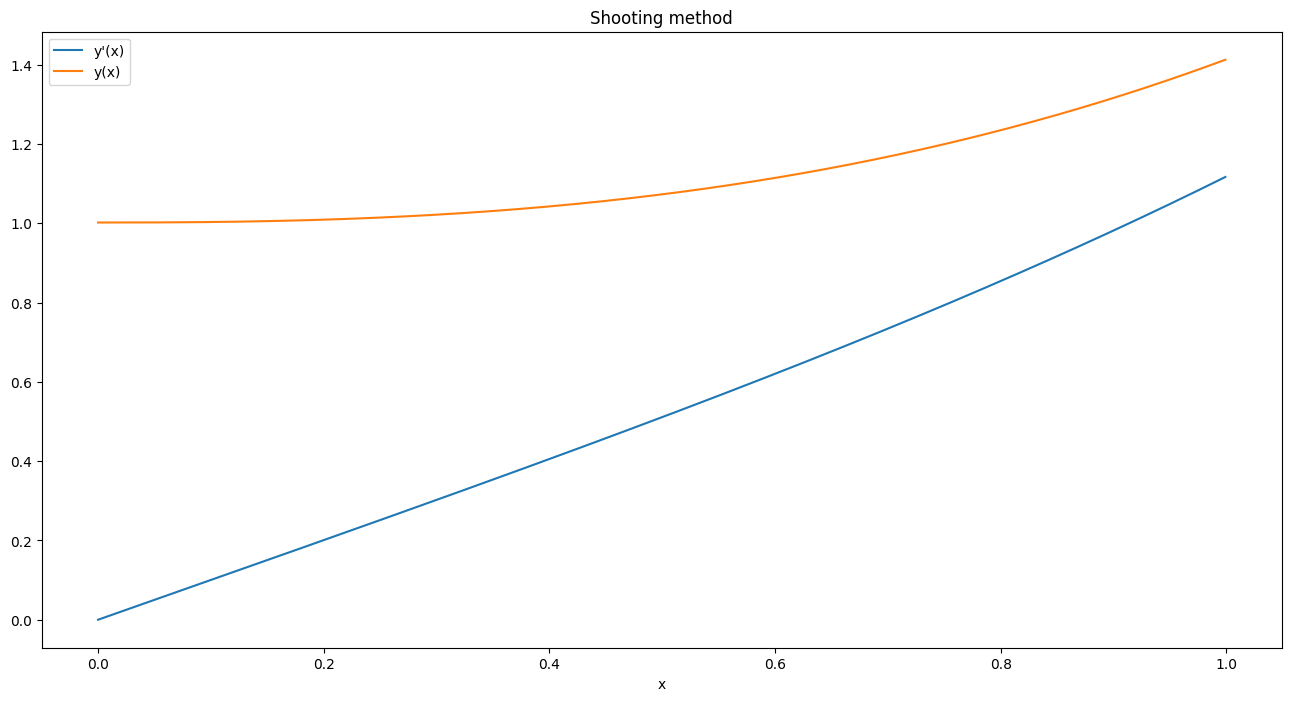

In [5]:
plt.figure(figsize=(16, 8))
plt.title(f"Shooting method")
plt.plot(x, y[:, 0], label="y'(x)")
plt.plot(x, y[:, 1], label="y(x)")
plt.xlabel("x")
plt.legend()

## Quasilinearization method